## Задача 1.  Матричные вычисления, оценка скорости и погрешностей (5 баллов).

1. Напишите функцию, которая вычисляет экспоненту от матрицы размера $2 \times 2$, используя определение экспоненты через предел

$$
\lim _{n \rightarrow \infty}(I+A / n)^n
$$

Элементами матрицы могут быть любые комплексные числа. Возведение матрицы в степень напишите, используя формулу   

$$
\alpha_n=(r+u)^n \quad \beta_n=(u-r)^n ; A^n=\frac{\alpha_n+\beta_n}{2} I+\frac{\alpha_n-\beta_n}{2 r}\left(v e_1+w e_2+t e_{12}\right) \\
r=\sqrt{w^2+v^2-t^2} ; \quad u=\frac{a+d}{2}, \quad v=\frac{a-d}{2}, \quad w=\frac{b+c}{2}, \quad t=\frac{b-c}{2}
$$

Здесь

$$
\begin{aligned}
& \left(\begin{array}{ll}
a & b \\
c & d
\end{array}\right)=u \cdot \mathbf{I}+v \cdot \mathbf{e}_1+w \cdot \mathbf{e}_2+t \cdot \mathbf{e}_{12} \\
& \mathbf{e}_1=\left(\begin{array}{cc}
1 & 0 \\
0 & -1
\end{array}\right), \quad \mathbf{e}_2=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right), \quad \mathbf{e}_{12}=\left(\begin{array}{cc}
0 & 1 \\
-1 & 0
\end{array}\right)
\end{aligned}
$$


Возьмите любую матрицу на ваш выбор и продемонстрируйте, как падает ошибка по спектральной норме при росте n, построив график зависимости ошибки от n. Дальнейшую часть задания делайте при каком-то достаточно большом n, при котором относительная ошибка очень мала.


2. Возьмите какую-то одну матрицу, экспоненту для которой вы знаете точно, с большим числом обусловленности, сгенерируйте 1000 случайных матриц для малых возмущений, элементы которых вещественные числа, распределенные равномерно в диапазоне от -0.01 до 0.01 (если элементы вашей матрицы довольно малы, то можете взять в значительно меньшем диапазоне). Постройте график спектральной нормы разницы точного значения экспоненты из этой матрицы и вычисляемой экспоненты из суммы матрицы и её возмущения, в зависимости от нормы возмущения.

3. Затем возьмите матрицу с маленьким числом обусловленности, экспоненту для которой вы знаете точно, и проделайте то же самое, что в пункте 2.

4. Постройте график зависимости времени работы программы в зависимости от количества вычисляемых экспонент для обоих предыдущих пунктов.

5. Вычислите функцию $f(t) = || e^{t A} ||$ (норма Фробениуса), используя формулы

$$
e^{t A}=\mathrm{Te}^{\mathrm{tJ}} \mathrm{~T}^{-1}
$$

$$
exp(\left[\begin{array}{cc}
\lambda t & t \\
0 & \lambda t
\end{array}\right]) = \left[\begin{array}{cc}
e^{\lambda t} & \frac{t e^{\lambda t}}{1!} \\
0 & e^{\lambda t}
\end{array}\right]
$$

$$
exp(\left[\begin{array}{cc}
a t & 0 \\
0 & b t
\end{array}\right]) = \left[\begin{array}{cc}
e^{a t} & 0 \\
0 & e^{b t}
\end{array}\right]
$$

Матрицу возьмите произвольную. Постройте график от t.


**Пункт 1**

In [387]:
import numpy as np

def expm(mat, n):

    e1 = np.array([[1.,0.],[0.,-1.]])
    I = np.eye(2)
    e2 = np.array([[0.,1.],[1.,0.]])
    e12 = np.array([[0.,1.],[-1.,0.]])

    A = I + mat/n

    u = (A[0][0]+A[1][1])/2
    v = (A[0][0]-A[1][1])/2
    w = (A[0][1]+A[1][0])/2
    t = (A[0][1]-A[1][0])/2
    r = np.sqrt(w**2+v**2-t**2)
    alpha = (r+u)**n
    beta = (u-r)**n

    return (alpha+beta)/2*I + (alpha-beta)/(2*r)*(v*e1+w*e2+t*e12)

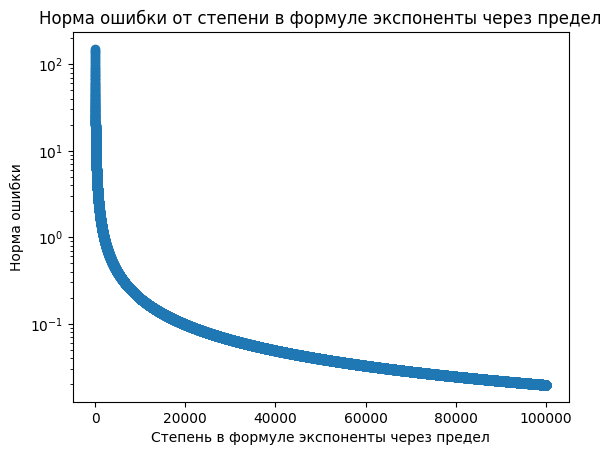

In [ ]:
import scipy
from matplotlib import pyplot as plt

mat = np.array([[3,2],[4,1]])


N = 100000
diffs = []
for i in range(1,N+1):
    diffs.append(np.linalg.norm(scipy.linalg.expm(mat)-expm(mat, i), ord=2))

plt.scatter(x = range(1,N+1), y = diffs)

plt.yscale("log")

plt.xlabel("Степень в формуле экспоненты через предел")
plt.ylabel("Норма ошибки")
plt.title("Норма ошибки от степени в формуле экспоненты через предел")
plt.show()

**Пункты 2-4**

Хорошая обусловленность


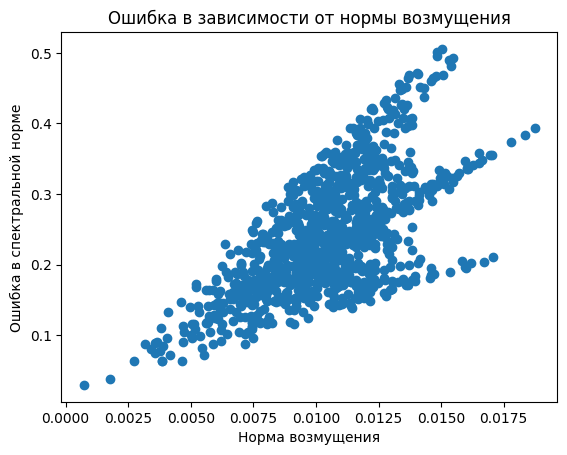

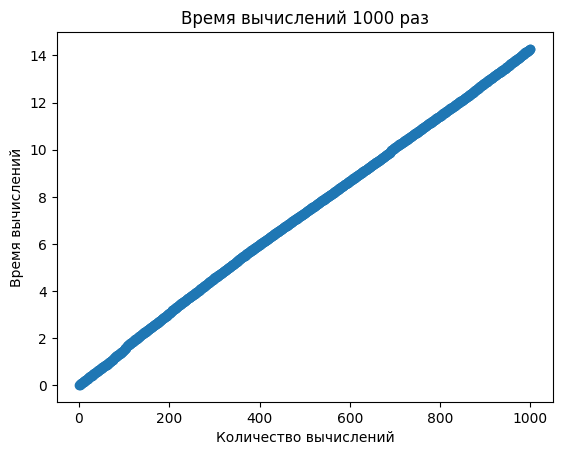

Плохая обусловленность


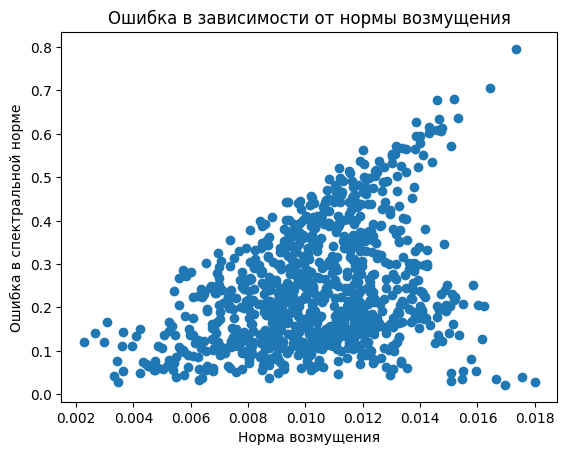

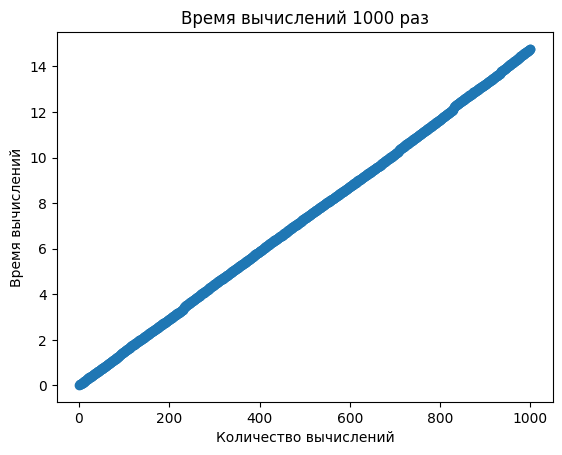

In [389]:
import time

def perturbation_analysis(matrix, exact_exp, num_perturbations=1000):
    perturbations = [np.random.uniform(-0.01, 0.01, (2, 2)) for _ in range(num_perturbations)]
    
    norms = []
    errors = []
    times = []
    
    for perturb in perturbations:
        perturbed_matrix = matrix + perturb

        start_time = time.time()
        # Считаем экспоненту 1000 раз для большей наглядности графика времени
        for _ in range(1000):
            approx_exp = expm(perturbed_matrix, 10000)
        end_time = time.time()

        norms.append(np.linalg.norm(perturb, ord=2))
        error = np.linalg.norm(exact_exp - approx_exp, ord=2)
        errors.append(error)
        times.append(end_time - start_time)
    
    # Построение графика
    plt.scatter(norms, errors)
    plt.xlabel('Норма возмущения')
    plt.ylabel('Ошибка в спектральной норме')
    plt.title('Ошибка в зависимости от нормы возмущения')
    plt.show()

    plt.scatter(x=range(1,1001), y=np.cumsum(times))
    plt.ylabel('Время вычислений')
    plt.xlabel('Количество вычислений')
    plt.title('Время вычислений 1000 раз')
    plt.show()
    
#Хорошая обусловленность
print("Хорошая обусловленность")
matrix = np.array([[3,0.5],[0.5,3]])
exact_exp = scipy.linalg.expm(matrix)

perturbation_analysis(matrix, exact_exp)

#Плохая обусловленность
print("Плохая обусловленность")
matrix = np.array([[2,1.8],[1.8,2]])
exact_exp = scipy.linalg.expm(matrix)


perturbation_analysis(matrix, exact_exp)

**Пункт 5**

In [390]:
from sympy import Matrix

def exptj(mat,t):
    T,J = Matrix(mat).jordan_form()
    J = np.array(J).astype(np.float64)
    T = np.array(T).astype(np.float64)

    exptjordan = np.array([[np.exp(J[0][0]*t), J[0][1]*np.exp(J[0][0]*t)],[0, np.exp(J[1][1]*t)]])

    return T @ exptjordan @ np.linalg.inv(T)

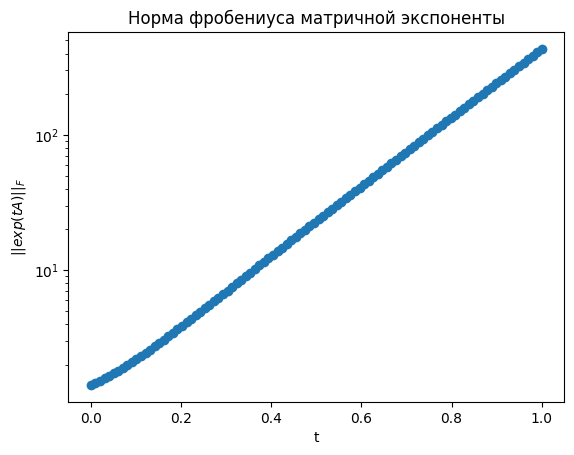

In [ ]:
matrix = np.array([[3,5],[1,4]])
norms = []

ts = np.linspace(0,1,100)

for t in ts:
    norms.append(np.linalg.norm(exptj(matrix,t),ord='fro'))

plt.scatter(x=ts, y=norms)

plt.yscale("log")

plt.xlabel("t")
plt.ylabel(r'$||exp(tA)||_F$')
plt.title("Норма фробениуса матричной экспоненты")
plt.show()

## Задача 2. Регуляризация и регрессия, метод наименьших квадратов и SVD (4 балла).

Мы хотим приблизить функцию $f(x,y)$ на квадрате $0 <= x <= 1; 0 <= y <= 1$ и проверить, насколько точно аппроксимация совпадает с этой функций на таблице значений с шагом $0.05$ (проще говоря, с таблицей чисел 21 на 21).

$$
f(x,y) = sin(x) \cdot cos(y) \cdot \ln(x+y+1)
$$

Проще говоря, мы ищем наилучшую аппроксимации среди моделей вида

$$
\check{y}(x, y)=g_{\mathbf{w}}(x, y)=\sum_{k=1}^m \mathbf{w}_k \cdot f_k(x, y)
$$

где $\left\{f_k(x, y)\right\}_{k=1}^m = \left\{sin(k_1 \cdot x) \cdot cos(k_2 \cdot y)\right\}_{k=1}^m$ -  набор из $m$ функций.

Здесь $m = 11^2, k_1 = 1 + (k-1) \ div \ 11, k_2 = (k-1) \ mod \ 11$ (остаток и целая часть от деления).

1. Постройте матрицу $X$ объект-признак размера $21^2 \times 11^2$ для этой задачи и визуализируйте ее.
2. Вычислите матрицу $X^T X$ и её число обусловленности. Оцените ошибку вычисления весов, исходя из машинной погрешности.
3. Найдите веса модели, использовав метод наименьших квадратов.
4. Постройте таблицу значений 21 на 21 с помощью модели и вычислите ошибку аппроксимации по спектральной норме.


**Пункт 1**

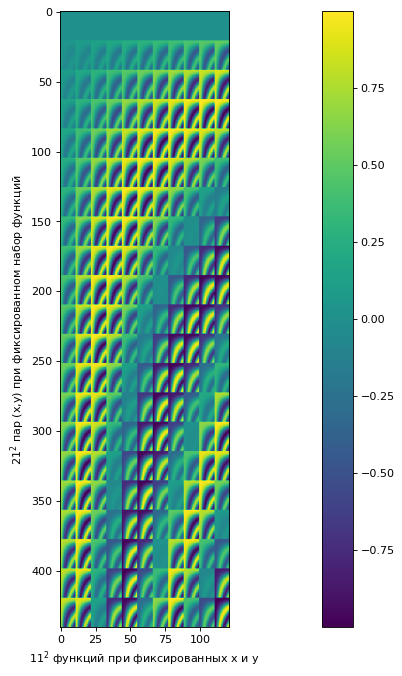

In [392]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

xs = np.linspace(0,1,21)
ys = np.linspace(0,1,21)

XY = np.array(list(itertools.product(xs,ys)))

m=11**2

X = np.array([[np.sin((1+(k-1)//11)*x)*np.cos(((k-1)%11)*y) for k in range(1,m+1)] for (x,y) in XY])

plt.figure(figsize=(30, 10), dpi=80)
plt.imshow(X)
plt.colorbar()
plt.xlabel(r'$11^2$ функций при фиксированных x и y')
plt.ylabel(r'$21^2$ пар (x,y) при фиксированном набор функций')
plt.show()


**Пункт 2**

In [393]:
A = X.T @ X

c = np.linalg.cond(A)

c

5.721685972609629e+17

Матрица вырождена - будем отбрасывать коррелирующие признаки

In [394]:
import pandas as pd

df = pd.DataFrame(X)

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.855)]

df.drop(to_drop, axis=1, inplace=True)

X_new = np.array(df)

X_new.shape

(441, 47)

Оставили несколько самых некоррелирующих признаков

Посмотрим график убывания сингулярных значений

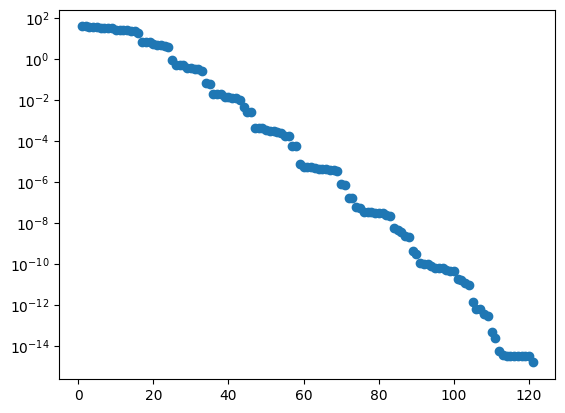

In [ ]:
U, S, V_t = scipy.linalg.svd(X)

plt.scatter(range(1,len(S)+1), S)

plt.yscale("log")

Из системы $(X^TX)w = X^Ty$ получим формулу $\dfrac{||\delta w||}{||w||} \leq \mu(X^TX) \dfrac{||\delta(X^Ty)||}{||X^Ty||}$, где $\dfrac{||\delta(X^Ty)||}{||X^Ty||} \leq 2^{-53}$ считаем погрешностью машинного округления для типа **float64** (альтернативно - **double**)

In [397]:
A = X_new.T @ X_new

c = np.linalg.cond(A)

print(f"Число обусловленности {c}")

delta_w_max = c * 2**(-53)

print(f'Относительная погрешность весов {delta_w_max*100} %')

Число обусловленности 2204130296406.2964
Относительная погрешность весов 0.02447076204344141 %


**Пункты 3,4**

In [398]:
Y = np.array([np.sin(x)*np.cos(y)*np.log(x+y+1) for (x,y) in XY])

w = np.linalg.inv( X_new.T @ X_new ) @ X_new.T @ Y

y_model = X_new @ w

error = np.linalg.norm((y_model-Y).reshape(21,21))

print(f'Спектральная норма ошибки {error}')

Спектральная норма ошибки 0.0698086460548412


Альтернативно можно решать с помошью метода главных компонент:

In [399]:
def tsvd(A, b, eps=1e-6):

    U, S, Vt = np.linalg.svd(A)
    r = np.sum(S > eps)
    
    U_tsvd = U[:, :r]
    S_tsvd = S[:r]
    Vt_tsvd = Vt[:r]

    Sinv = np.diag(1/S_tsvd)

    x_tsvd = Vt_tsvd[:r, :].T @ Sinv @ U_tsvd[:, :r].T @ b

    U_add = U[:, r:]
    Vt_add = Vt[r:]

    C2 = U_add.T @ A @ Vt_add.T
    b2 = U_add.T @ b

    z2 = np.linalg.solve(C2, b2)
    x = x_tsvd + Vt_add.T @ z2


    res = np.linalg.norm(A @ x - b)
    return x, res,r

w, res, r = tsvd(X.T @ X, X.T @ Y)

y_model = X @ w

error = np.linalg.norm((y_model-Y).reshape(21,21))

print(f'Спектральная норма ошибки {error}, число признаков {r}')

Спектральная норма ошибки 0.05111087294046915, число признаков 46


## Задача 3. Решение нелинейных уравнений и поиск минимума функций. (3 балла).

Свести задачу решения системы нелинейных уравнений $\left\{\begin{array}{l}x^2-y^2=1, \\ x y^3-y=4\end{array}\right.$ к задаче поиска минимума.

1. Найдите минимум полученного функционала методом наискорейшего спуска.

2. Найдите минимум полученного функционала методом сопряженных градиентов.

3. Сравните эффективность этих методов - постройте графики зависимости точности от количества итераций.


**Пункт 1**

In [400]:
import numpy as np
import matplotlib.pyplot as plt

def L(v):
    return (v[0]**2 - v[1]**2 - 1)**2 + (v[0]* v[1]**3 - v[1] - 4)**2

def grad_L(v):
    dL_dx = 4 * (v[0]**2 - v[1]**2 - 1) * v[0] + 2 * (v[0] * v[1]**3 - v[1] - 4) * v[1]**3
    dL_dy = -4 * (v[0]**2 - v[1]**2 - 1) * v[1] + 2 * (v[0] * v[1]**3 - v[1] - 4) * (3 * v[0] * v[1]**2 - 1)
    return np.array([dL_dx, dL_dy])

In [401]:
from scipy.optimize import minimize

min_p = minimize(L, x0=[1.5,1.5])['x']

min_p

array([1.76659112, 1.45631183])

In [402]:
def gradient_descent(start, learning_rate=0.007, max_iter=1000, tolerance=1e-8):
    x = start
    history = [x]
    iters=0
    err = [np.linalg.norm(x-min_p)]
    
    for i in range(max_iter):
        grad = grad_L(x)
        x_new = x - learning_rate * grad
        
        if np.linalg.norm(x_new - x) < tolerance:
            break
        
        x = x_new
        history.append(x)
        err.append(np.linalg.norm(x-min_p))
        iters+=1
    
    return x, history, iters, err

In [403]:
from scipy.optimize import minimize_scalar

def hestens_shtifel(r_new,r,s):
    return max(0, np.dot(r_new,r_new-r)/np.dot(s,r_new-r))

def conjugate_gradients(starting_point, algorythm=hestens_shtifel, epsilon=10**(-8), iter_max = 1000):
    x = starting_point
    iterations = 0
    steps = [x]
    err = [np.linalg.norm(x-min_p)]
    
    flag = 0

    r = -grad_L(x)
    S = r

    while iterations<iter_max:
        phi = lambda a: L(x + a * S)
        alpha = minimize_scalar(phi).x
        x_new = x + alpha * S

        r_new = -grad_L(x_new)
        
        beta = algorythm(r_new,r,S)
        
        if flag:
            beta = 0

        S = r_new + beta * S

        iterations += 1
        steps.append(x_new)
        err.append(np.linalg.norm(x-min_p))

        if (np.linalg.norm(x_new - x) < epsilon):
            if flag:
                x = x_new
                break
            else:
                flag = 1
                x = x_new
                r = r_new
                continue

        flag = 0
            
        x = x_new
        r = r_new

    return x, np.array(steps), iterations, err

In [404]:
def show_path(algorythm, starting_point):

    # Генерация сетки для построения линий уровня
    x = np.linspace(1.4, 1.8, 400)
    y = np.linspace(1.4, 1.6, 400)
    X, Y = np.meshgrid(x, y)
    Z = L((X,Y))

    # Вызов функции градиентного спуска
    min_point, steps, iterations, err = algorythm(starting_point)

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=10, cmap='viridis')
    plt.colorbar()

    # Построение линий уровня
    contour = plt.contour(X, Y, Z, levels=10, colors='black')

    # Подписи к линиям уровня
    plt.clabel(contour, colors='k', fmt='%2.1f', fontsize=12)

    # Построение шагов алгоритма

    for i in range(len(steps)-1):
        plt.arrow(steps[i][0], steps[i][1], steps[i+1][0] - steps[i][0], steps[i+1][1] - steps[i][1], 
                shape='full', lw=1, color='red', length_includes_head=True, head_width=0.01, zorder=4)

    # Подпись с количеством итераций
    plt.text(1.6,1.57, f'Iterations: {iterations}', color='white', fontsize=12)

    # Настройка осей и отображение
    plt.xlim([1.4, 1.8])
    plt.ylim([1.4, 1.6])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Visualization')
    plt.show()

    return min_point, err

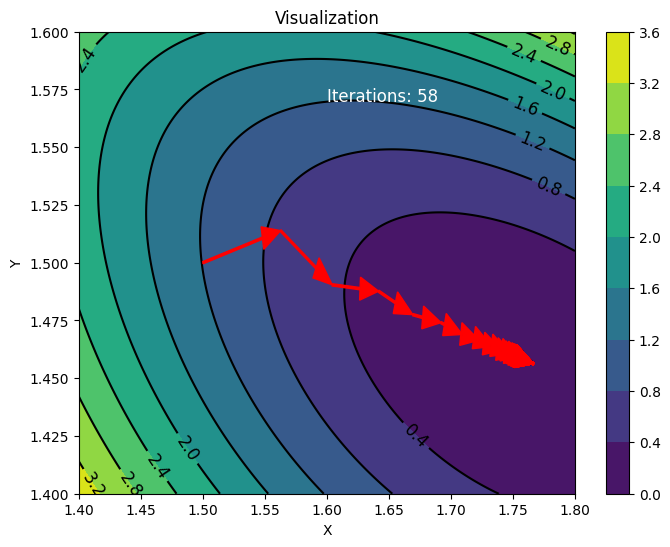

In [405]:
min_grad, err_grad = show_path(gradient_descent, (1.5,1.5))

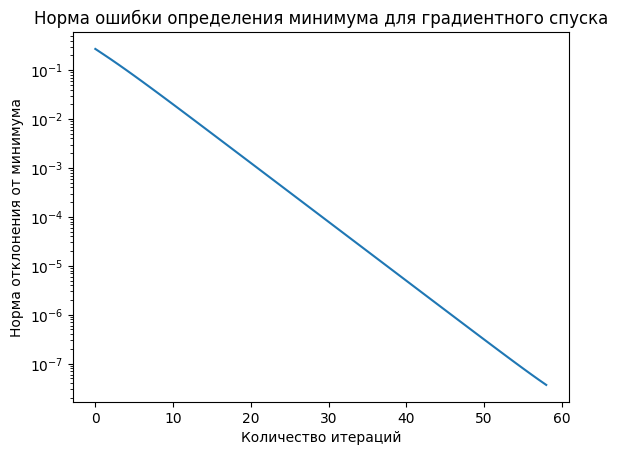

In [ ]:
plt.plot(err_grad)

plt.yscale("log")

plt.xlabel("Количество итераций")
plt.ylabel('Норма отклонения от минимума')
plt.title('Норма ошибки определения минимума для градиентного спуска')
plt.show()

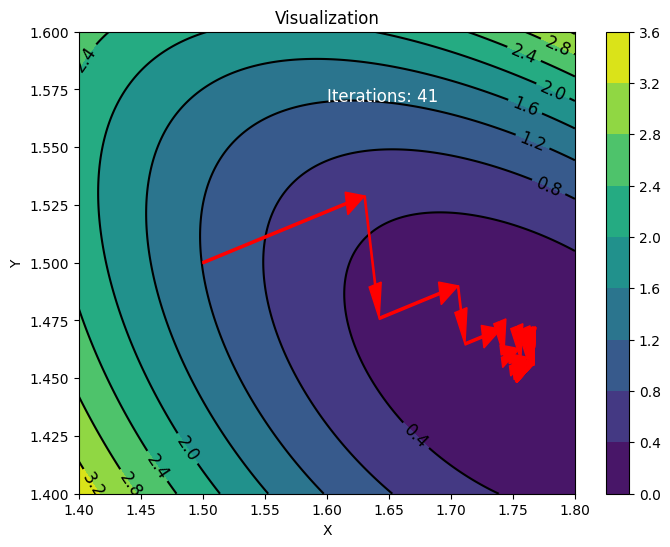

In [407]:
min_conj, err_conj = show_path(conjugate_gradients, (1.5,1.5))

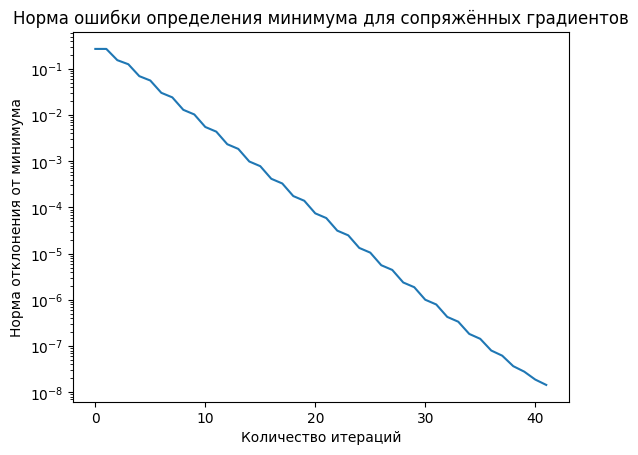

In [ ]:
plt.plot(err_conj)

plt.yscale("log")

plt.xlabel("Количество итераций")
plt.ylabel('Норма отклонения от минимума')
plt.title('Норма ошибки определения минимума для сопряжённых градиентов')
plt.show()

In [409]:
print(min_grad)
print(min_conj)
print(min_p)

[1.76659108 1.45631185]
[1.76659111 1.45631184]
[1.76659112 1.45631183]
